# Analysis on Haberman Cancer Survival dataset BY HIMANSHU NEGI.

# Haberman Cancer Survival dataset

### The dataset contains cases study of patients who had undergone surgery for breast cancer.

### Two status/class for cancer patient who survived  i.e 1 for (5 or 5+ years), 2 for (< 5 years)

## Objective: Classify the status/class of patient who undergone surgery i.e 1 or 2

### ATTRIBUTES:Age,year,nodes,status

#### Age:when patient undergo surgery(30-83)
#### year:year of surgery when patient undergo surgery(19yy)
#### nodes:Number of positive axillary nodes detected
#### status:survival status of patient after surgery

In [ ]:
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set#haberman.csv'''
#Load haberman.csv into a pandas dataFrame.
hc = pd.read_csv("haberman.csv")

In [38]:
hc.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


(Q) how many data-points and features?

In [39]:
print (hc.shape)

(306, 4)


(Q) What are the column names in our dataset?

In [40]:
print (hc.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


(Q) How many data points for each class are present? 
    (or) How many cases for each status are present?

In [41]:
hc["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

balanced-dataset vs imbalanced datasets
hc is a unbalanced dataset as the number of data points for both class having  huge difference.
FROM ABOVE VALUES OUR SUCCESS RATE WILL ALWAYS BE 73%
class1-(225), class2-(81)

In [42]:
print('age interval')
print(  min(hc.age) , max(hc.age) )


age interval
30 83


FROM THIS INFORMATION WE COME TO KNOW THAT NO ONE HAVE CANCER BELOW THEN 30

In [43]:
print('operational year interval')
print(  min(hc.year) , max(hc.year) )

operational year interval
58 69


2-D scatter plot:
ALWAYS understand the axis: labels and scale.

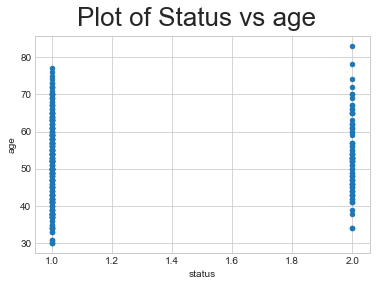

In [56]:
hc.plot(kind='scatter', x='status', y='age') ;
plt.suptitle("Plot of Status vs age",size =26);
plt.show()



  OBSERVATION: 
  1> FROM ABOVE GRAPH WE COME TO KNOW THAT PATIENT HAVING AGE>77 WHO UNDERGO OPERATION NOT ABLE TO SURVIVE 5 YEARS.
  
  2>AS WELL AS THE AGE<40 HAVING SUCCESS RATE IS ABOVE 90% .
  
  3>HERE WE CAN USE IF AND ELSE CONDITION TO PREDECT OUR RESULTS.

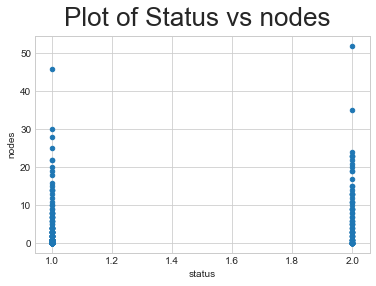

In [55]:
hc.plot(kind='scatter', x='status', y='nodes') ;
plt.suptitle("Plot of Status vs nodes",size =26);
plt.show()


OBSERVATION:
    
WE KNOW SUCCESS RATE OF THIS SURGERY IS >73% SO IF THE NO. OF NODES ARE <20 SUCCESS RATE IS 80%
IF THE NO. OF NODES ARE >20 SUCCESS RATE IS ~50%
HERE WE CAN USE IF AND ELSE CONDITION TO PREDECT OUR RESULTS

OBSERVATION:

1>WE KNOW SUCCESS RATE OF THIS SURGERY IS >73% SO IF THE NO. OF NODES ARE 20 SUCCESS RATE IS ~50%.

2>HERE WE CAN USE IF AND ELSE CONDITION TO PREDECT OUR RESULTS.

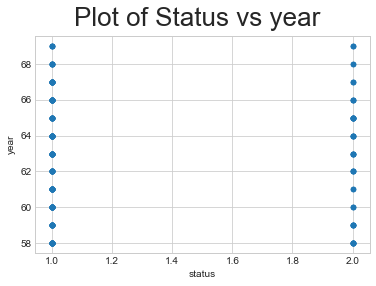

In [58]:
hc.plot(kind='scatter', x='status', y='year') ;
plt.suptitle("Plot of Status vs year",size =26);
plt.show()
#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

OBSERVATION:
   Year of treatment/cancer is not a usefull feature so we can easily disgard it. 

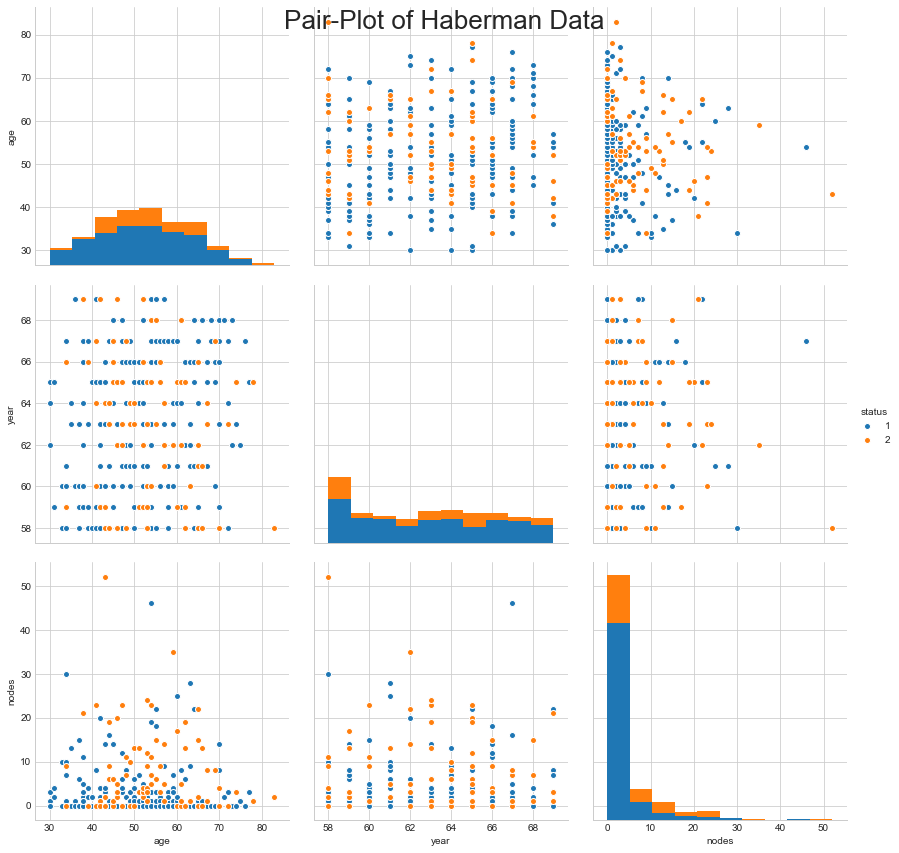

In [48]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hc, hue="status",x_vars =['age','year','nodes'],y_vars =['age','year','nodes'], size=4);
plt.suptitle("Pair-Plot of Haberman Data",size =26);
plt.show();

        OBSERVATIONS:   
  1> As we can see the graphs are highly overlapped so it here it is very difficult to predict the survival of the patients          who had undergone surgery for breast cancer on the basis of these 3 features (i.e. Age, Operation_Year and     axil_nodes).
   
  2> It can't be sapareted via plane/line due to high overlapping.
   
  3> Here we require more features or information to correctly classify the points.
   
  4> We need to use models which will give better results for unbalanced and non-linear data.
   
  5> Here NO. OF NODES and AGE of patient are more useful where as year of operation is not a useful feature
   


       

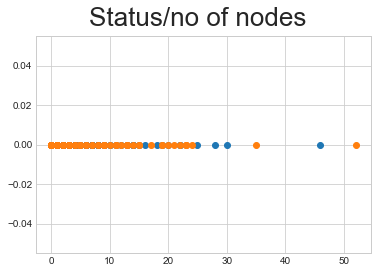

In [80]:
import numpy as np
plt.suptitle("Status/no of nodes",size=26);

hc_1 = hc.loc[hc["status"] == 1];
hc_2 = hc.loc[hc["status"] == 2];

plt.plot(hc_1["nodes"], np.zeros_like(hc_1['nodes']), 'o')
plt.plot(hc_2["nodes"], np.zeros_like(hc_2['nodes']), 'o')


plt.show()


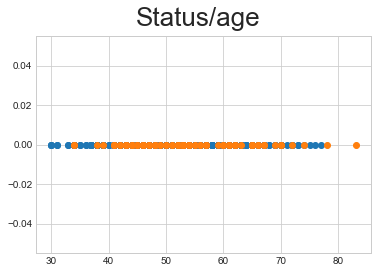

In [69]:
import numpy as np
plt.suptitle("Status/age",size =26);
hc_1 = hc.loc[hc["status"] == 1];
hc_2 = hc.loc[hc["status"] == 2];


plt.plot(hc_1["age"], np.zeros_like(hc_1['age']), 'o')
plt.plot(hc_2["age"], np.zeros_like(hc_2['age']), 'o')


plt.show()



     OBSERVATIONS:
     
  1> IF NO OF NODES ARE > 25 There will be more chances that the person will die/STATUS IS 2.

  2> here we are unable to identify the status with (no. of NODES<25) i.e highly overlapped data.
 
  3> AGE B/W (68-77) SUCCESS RATE 50%.
    
  4> AGE >77 SUCCESS RATE 0%.

# PDF

C:\Users\HIMANSHU NEGI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HIMANSHU NEGI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


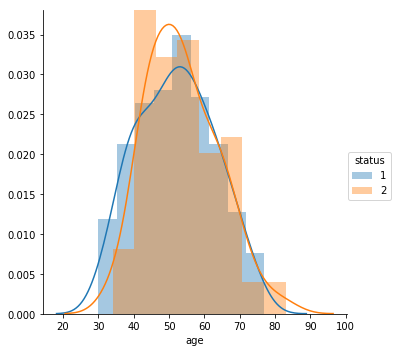

In [13]:
sns.FacetGrid(hc,hue="status",size=5) \
.map(sns.distplot,"age") \
.add_legend();
plt.show();
 

   OBSERVATIONS:
 
  1> AGE AGE BETWEEN (42-52) FAILURE RATE HIGH 55%.
  
  2> AGE BETWEEN (52-66) SUCCESS RATE HIGH 80%.
 
  3> AGE BETWEEN (66-71) FAILURE RATE HIGH 55%.
 
  4> AGE BETWEEN (71-77) SUCCESS RATE HIGH 80%.
 
  5> OVER ALL RATE OF SUCCESS B/W AGE(42-77) IS 75% .

C:\Users\HIMANSHU NEGI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HIMANSHU NEGI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


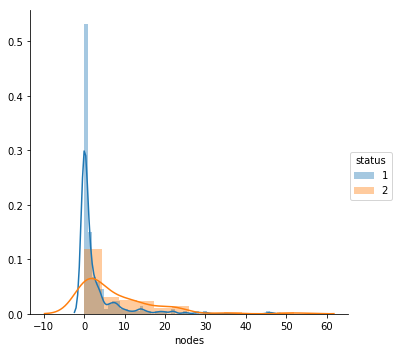

In [14]:
sns.FacetGrid(hc,hue="status",size=5) \
.map(sns.distplot,"nodes") \
.add_legend();
plt.show();




OBSERVATIONS:

1> IF NO OF NODES IS <5 SUCCESS RATE IS 95%.

2> IF NO OF NODES B/W (5-10) SUCCESS RATE IS 45%.

3> IF NO OF NODES B/W (10-30) SUCCESS RATE IS 30%.

4> IF NO OF NODES IS >30 SUCCESS RATE IS 10%.

#  CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


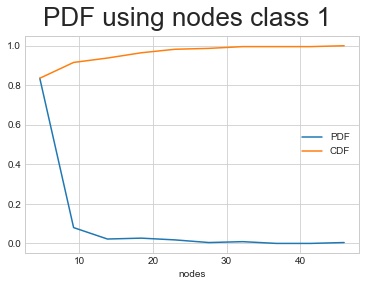

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


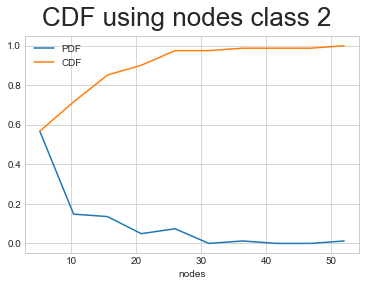

In [89]:
counts, bin_edges = np.histogram(hc_1['nodes'], bins=10, 
                                 density = True)
plt.suptitle("PDF using nodes class 1",size =26);
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF')
plt.legend();
plt.xlabel("nodes");


plt.show();
##
counts, bin_edges = np.histogram(hc_2['nodes'], bins=10, 
                                 density = True)
plt.suptitle("CDF using nodes class 2",size =26);
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF')
plt.legend();
plt.xlabel("nodes");


plt.show();


ODSERVATION CLASS 1:-

1> Here for CLASS 1 around 90% patients survived who have no. of nodes less than 10.

2> So here we can say that lower the number of nodes higher will be the chances of survival.

3> Patients with 23 or more axil_nodes have around 1%-2% chances of survival .

ODSERVATION CLASS 2:-

1> Here around 70% of patients died within 5 years who have (no of nodes<10)&& Almost 99% patients who died having 
(no.of nodes<25).

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


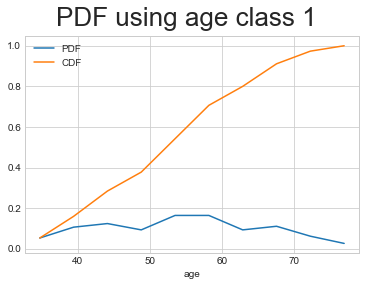

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


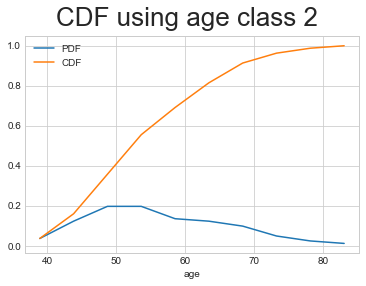

In [90]:
counts, bin_edges = np.histogram(hc_1['age'], bins=10, 
                                 density = True)
plt.suptitle("PDF using age class 1",size =26);
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF')

plt.legend();
plt.xlabel("age");

plt.show();

counts, bin_edges = np.histogram(hc_2['age'], bins=10, 
                                 density = True)
plt.suptitle("CDF using age class 2",size =26);
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = 'PDF');
plt.plot(bin_edges[1:], cdf,label = 'CDF')

plt.legend();
plt.xlabel("age");

plt.show();

plt.show();


ODSERVATION CLASS 1:-

1> Here for CLASS 1 around 90% patients survived who have age less than 67.

2> Here for CLASS 1 around 100% patients survived who have age less than 13.

3> Patients with 23 or more axil_nodes have around 1%-2% chances of survival.

4> Patients with age b/w 53-58 having around 60% chances of survival. 

OBSERVATION CLASS 2:-

1> Here the patients who had undergone surgery between age of 45 to 55 have lesser chances of survival .
2> Around 72% of patients who died within 5 years are less than or equal to the age of 60 years .

In [23]:
print("Means:")
print(np.mean(hc_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(hc_1["age"],5000)));
print(np.mean(hc_1["age"]))
print(np.mean(hc_2["age"]))

print("\nStd-dev:");
print(np.std(hc_1["age"]))
print(np.std(hc_2["age"]))



Means:
52.01777777777778
73.91150442477876
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [32]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hc_1["age"]))
#Median with an outlier
print(np.median(np.append(hc_1["age"],5000)));
print(np.median(hc_2["age"]))



print("\nQuantiles:")
print(np.percentile(hc_1["age"],np.arange(0, 100, 25)))
print(np.percentile(hc_2["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hc_1["age"],90))
print(np.percentile(hc_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hc_1["age"]))
print(robust.mad(hc_2["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# boxplot

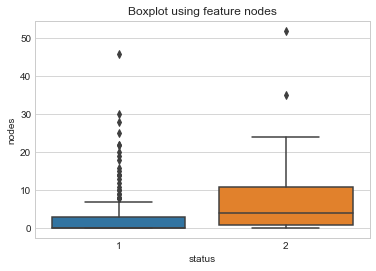

In [99]:
plt.title("Boxplot using feature nodes");
sns.boxplot(x='status',y='nodes', data=hc)
plt.show()



ODSERVATION :-

1> Here Box plot of both classes overlap around 85% and both havig maximum density between 0 to 10 with roughly similar spread. 

2> So no of nodes alone is not that useful for classifying survival status of patients .

3>Box plot of class 1 have many outliers .

4>Around 70% patients who survived have axil nodes less than or equal to 4.

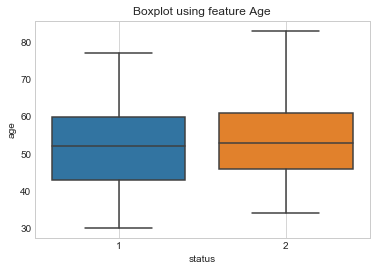

In [101]:
# Boxplot using feature Age :
sns.boxplot(x='status',y='age', data=hc);
plt.grid();
plt.title("Boxplot using feature Age");
plt.show();

OBSERVATION :- 

1> Here Box plot of both classes overlap around 90% and have almost similar spread and median, so Age alone is not useful for classifying survival status of patients .

# voilen plots

C:\Users\HIMANSHU NEGI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


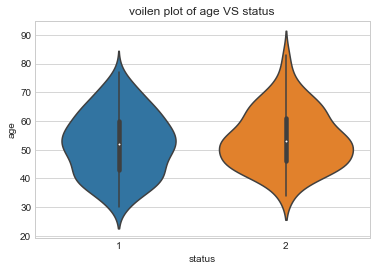

In [108]:
plt.title("voilen plot of age VS status");
sns.violinplot(x="status", y="age", data=hc, size=8)
plt.show()



OBSERVATIONS:-

1> here we have 100% failure rate above age 77.

2> below 440 age success 80%.

3> b/w 40-60 age success 70%.

4> b/w 60-77 age success 60%.

5> we can write if and else condition to built such model.

C:\Users\HIMANSHU NEGI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


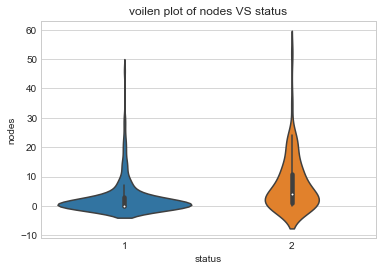

In [107]:
plt.title("voilen plot of nodes VS status");
sns.violinplot(x="status", y="nodes", data=hc, size=8)
plt.show()



OBSERVATIONS:- 

1> no of nodes <10 80% success.

2> no of nodes >10 70% fail.

# Perform Bivariate Analysis (Scatter plots , Pair-plots) to see if combinations of features are useful in classification of habermaen dataset

# scatter plots

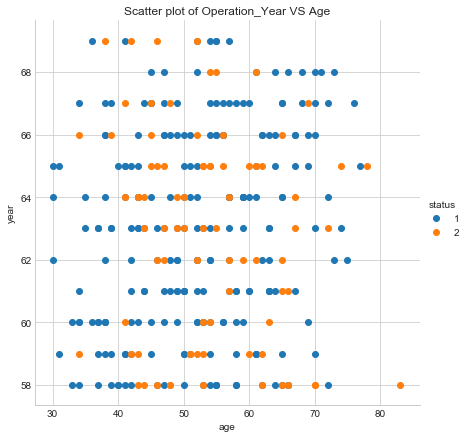

In [104]:
sns.set_style("whitegrid");
sns.FacetGrid(hc, hue="status", size=6).map(plt.scatter, "age", "year").add_legend();
plt.title("Scatter plot of Operation_Year VS Age");
plt.show();

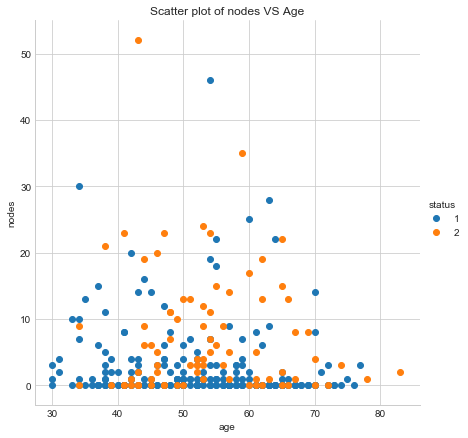

In [105]:
sns.set_style("whitegrid");
sns.FacetGrid(hc, hue="status", size=6).map(plt.scatter, "age", "nodes").add_legend();
plt.title("Scatter plot of nodes VS Age");
plt.show();

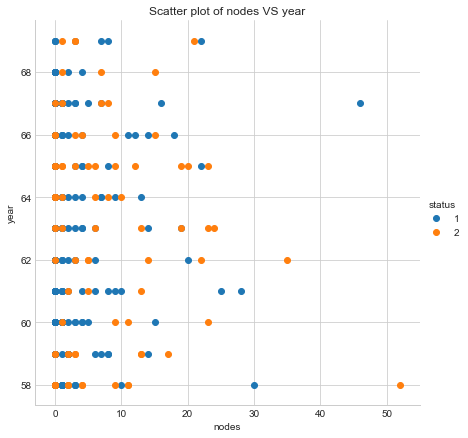

In [106]:
sns.set_style("whitegrid");
sns.FacetGrid(hc, hue="status", size=6).map(plt.scatter, "nodes", "year").add_legend();
plt.title("Scatter plot of nodes VS year");
plt.show();

# OBSERVATIONS OF ALL 3 ABOVE SCATTER PLOTS

AS WE CAN SEE IN ALL THREE BIVARIATE PAIR PLOTS  DATA IS HIGHLY OVERLAPPED i.e AROUND 90% AND above SO IT IS VERY DIFFICULT TO CLASSIFY ON BIVARIATE ANALYSIS

# 3-D plot

In [115]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [120]:
# x , y and z of class 1 ( 1 = patients who survived for 5 years or more)
x_1 = hc.age[hc.status == 1]
y_1 = hc.year[hc.status == 1]
z_1 = hc.nodes[hc.status == 1]

In [121]:
# x , y and z of class 2 ( 2 = patients who died within 5 years)
x_2 = hc.age[hc.status == 2]
y_2 = hc.year[hc.status == 2]
z_2 = hc.nodes[hc.status == 2]

In [136]:
# trace1 of class = 1
trace1 = go.Scatter3d(
    x=x_1,
    y=y_1,
    z=z_1,
    name = 'class 1 ( 1 = patients who survived for 5 years or more)',
    mode='markers',
    marker=dict(
        size=12,
        color='rgb(255,0,0)' ,# set color to an array/list of desired values
        symbol = 'circle'

    )
)

In [137]:
# trace2 of class = 2
trace2 = go.Scatter3d(
    x=x_2,
    y=y_2,
    z=z_2,
    name = 'class 2 ( 2 = patients who died within 5 years)',
    mode='markers',
    marker=dict(
        size=12,
        color='rgb(0,0,255)' ,# set color to an array/list of desired values
        symbol = 'circle'

    )
)

In [139]:
data = [trace1, trace2]
layout = go.Layout(
  
    title = "3D Plot Of Haberman Data",
    scene=dict(
    xaxis=dict(
        title='Age',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Operation_Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),  
    zaxis=dict(
        title='axil_nodes',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),), 
    
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30
   )
)

In [140]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='haberman-3d-scatter')

OBSERVATION :- 

1> We can clearly see in above 3D Plot that there is high overlaping and it is very difficult to predict the survival of patients on the basis of these features i.e.(Age , Opeational_Year and axil_nodes).

2>It is v.difficult to classify points/status with linear model.